In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Setting up visualizations
sns.set(style="whitegrid")

In [2]:
# Load the datasets
red_wine = pd.read_csv('/Users/jorgen/Documents/tastywine/wine+quality/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('/Users/jorgen/Documents/tastywine/wine+quality/winequality-white.csv', delimiter=';')

# Display basic info and initial statistics to understand the data
print("Red Wine Data:\n", red_wine.head())
print("White Wine Data:\n", white_wine.describe())

Red Wine Data:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

In [3]:
def preprocess_data(data):
    """
    Prepare data for modeling:
    - Convert quality scores to binary classification for simplicity.
    - Encode labels and scale features to standardize for XGBoost.
    """
    # Convert quality scores to binary labels
    data['quality_label'] = (data['quality'] > 5).astype(int)
    label_encoder = LabelEncoder()
    data['encoded_label'] = label_encoder.fit_transform(data['quality_label'])
    
    # Scale features
    features = data.drop(['quality', 'quality_label', 'encoded_label'], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    return scaled_features, data['encoded_label']

# Apply preprocessing to datasets
X_red, y_red = preprocess_data(red_wine)
X_white, y_white = preprocess_data(white_wine)

In [4]:
# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

Red Wine Model:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.83      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



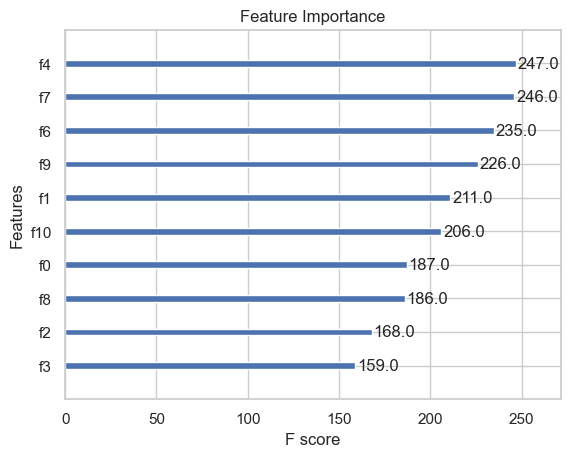

White Wine Model:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       321
           1       0.87      0.89      0.88       659

    accuracy                           0.83       980
   macro avg       0.81      0.80      0.81       980
weighted avg       0.83      0.83      0.83       980



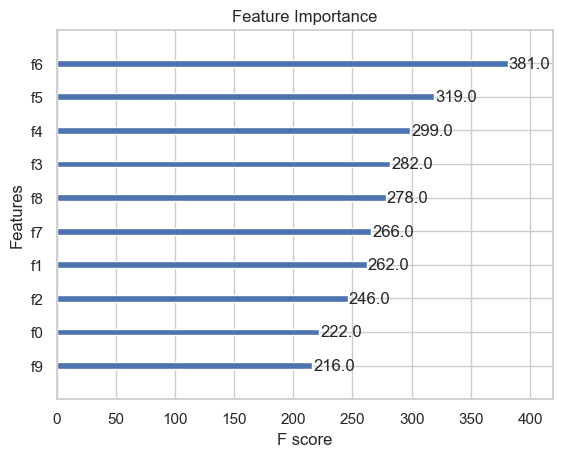

In [5]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Train XGBoost model and evaluate its performance. Also, plot feature importance.
    - Useful for identifying key factors affecting wine quality.
    """
    model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))

    # Plotting feature importance
    xgb.plot_importance(model, max_num_features=10, importance_type='weight')
    plt.title('Feature Importance')
    plt.show()
    
    return model

# Train on red wine data
print("Red Wine Model:")
model_red = train_and_evaluate(X_red_train, y_red_train, X_red_test, y_red_test)
# Train on white wine data
print("White Wine Model:")
model_white = train_and_evaluate(X_white_train, y_white_train, X_white_test, y_white_test)

Advanced Analysis - Red Wine:


/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will n

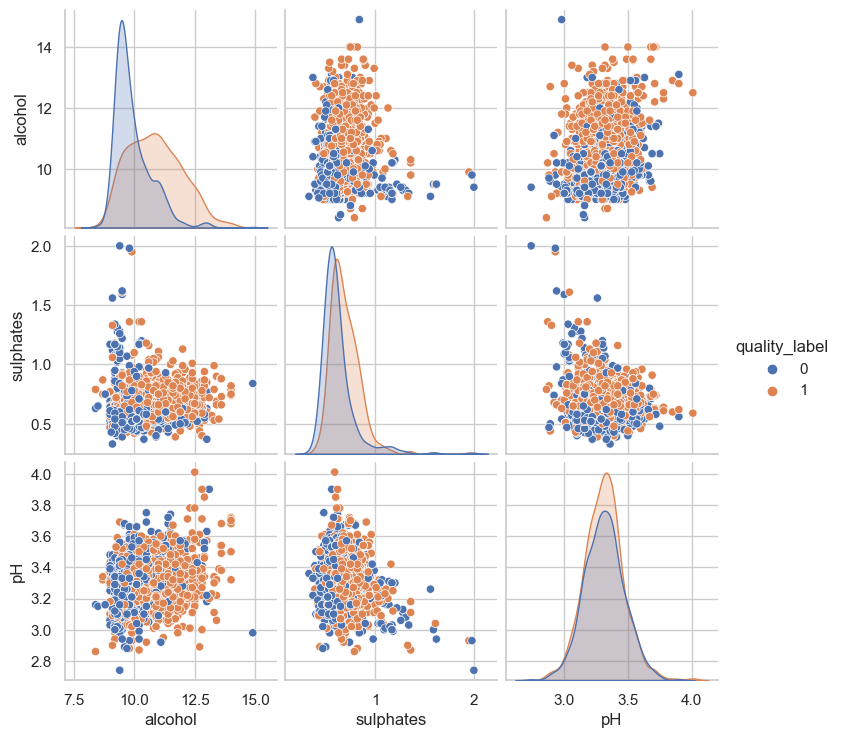

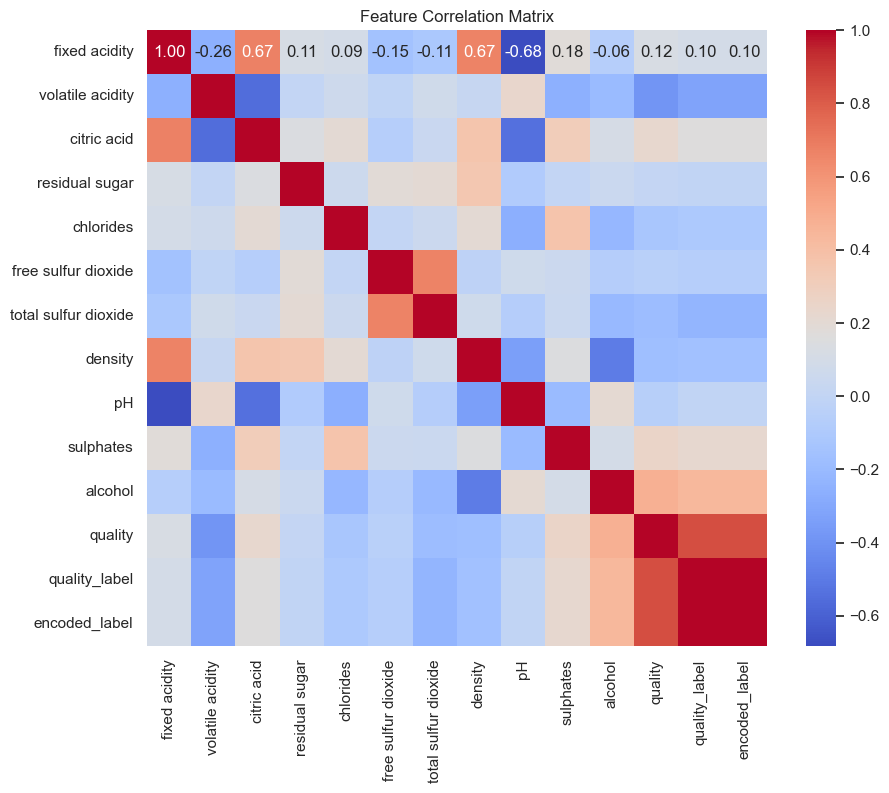

Advanced Analysis - White Wine:


/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will n

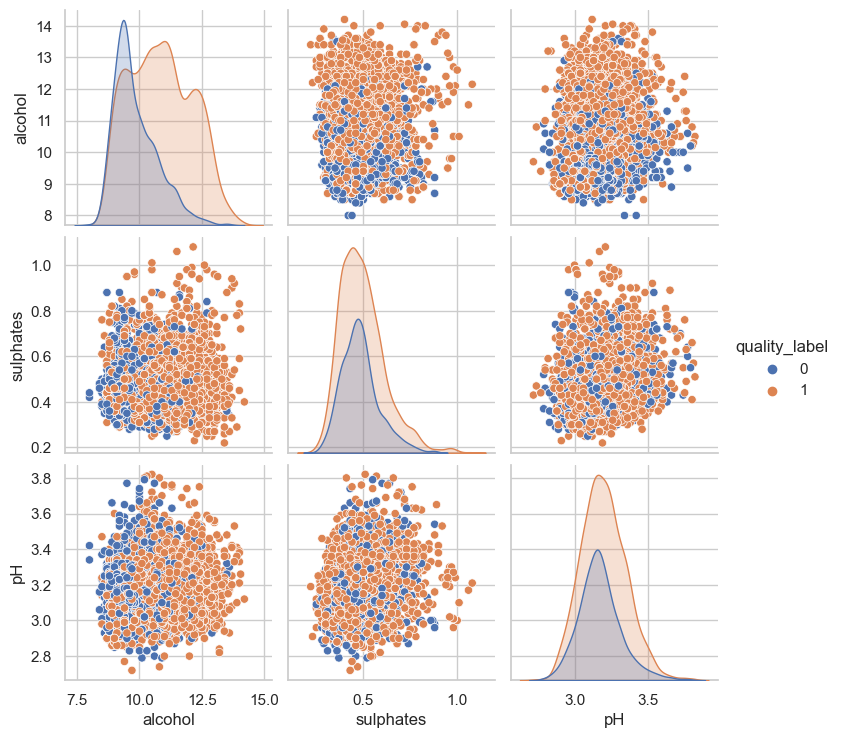

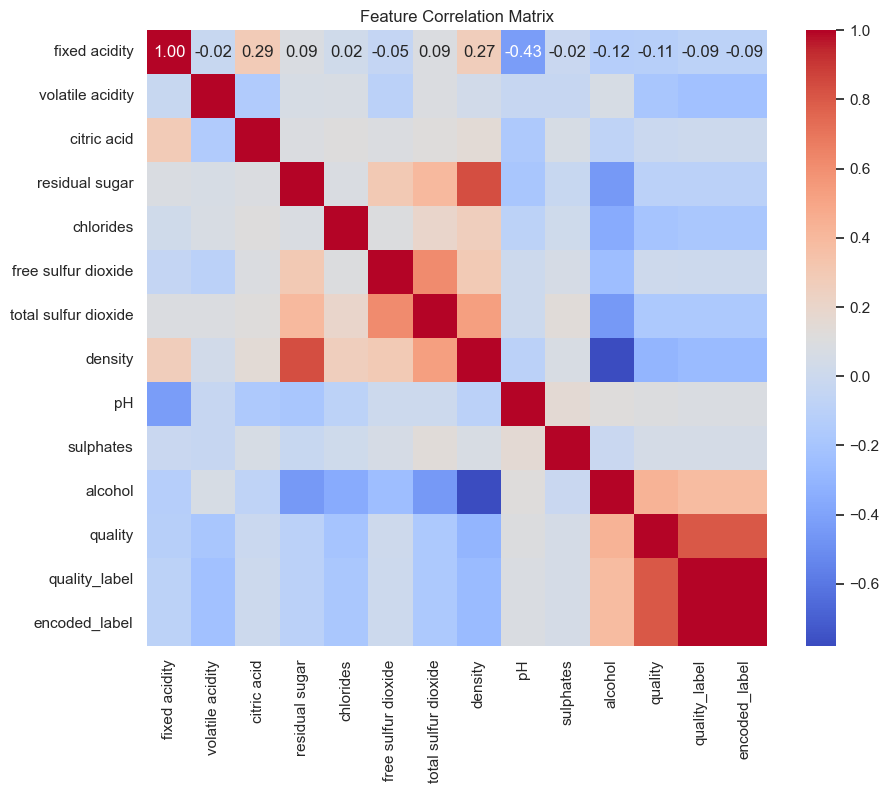

In [6]:
def advanced_analysis(data, quality_column='quality_label'):
    """
    Perform advanced statistical analysis to explore deeper relationships.
    - Use seaborn for pair plots or correlation heatmaps.
    """
    sns.pairplot(data, hue=quality_column, vars=['alcohol', 'sulphates', 'pH'])
    plt.show()

    # Correlation heatmap
    correlation = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Matrix')
    plt.show()

# Call function for deeper analysis
print("Advanced Analysis - Red Wine:")
advanced_analysis(red_wine)

print("Advanced Analysis - White Wine:")
advanced_analysis(white_wine)

In [7]:
def prepare_documentation(model, data_type=''):
    """
    Prepare documentation and visualizations for sharing findings.
    - Useful for reports and stakeholder presentations.
    """
    feature_importances = model.feature_importances_
    feature_names = data_type.columns.drop(['quality', 'quality_label', 'encoded_label'])
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print(f"Feature Importances for {data_type} Data:")
    print(importance_df)

# Prepare documentation for red and white wine models
prepare_documentation(model_red, red_wine)
prepare_documentation(model_white, white_wine)

def conduct_training(model, X_train, y_train):
    """
    Conduct training sessions to educate the production team on model insights.
    - Translate insights into actionable steps.
    """
    # Example: Tune model parameters for better performance
    params = {
        'max_depth': 5,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }
    tuned_model = xgb.XGBClassifier(**params)
    tuned_model.fit(X_train, y_train)
    print("Training completed with tuned parameters.")

# Conduct training sessions (examples)
conduct_training(model_red, X_red_train, y_red_train)
conduct_training(model_white, X_white_train, y_white_train)

Feature Importances for       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

   

In [8]:
def summarize_findings():
    """
    Summarize key findings and actionable insights from the analysis.
    - Useful for decision-making and strategic planning.
    """
    print("Summary of Findings:")
    print("1. Key features influencing wine quality have been identified.")
    print("2. Models have been trained and evaluated, with performance metrics provided.")
    print("3. Advanced analysis has been performed to understand deeper relationships in the data.")
    print("4. Recommendations for production improvements have been suggested based on feature importance.")

summarize_findings()

Summary of Findings:
1. Key features influencing wine quality have been identified.
2. Models have been trained and evaluated, with performance metrics provided.
3. Advanced analysis has been performed to understand deeper relationships in the data.
4. Recommendations for production improvements have been suggested based on feature importance.


# Paramater Tuning

In [13]:
# Import the GridSearchCV class from sklearn to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [14]:
# Define a dictionary where the keys are the parameter names and the values are lists of parameter settings to try.
# 'max_depth': Maximum depth of the individual trees.
# 'learning_rate': Step size shrinkage used in update to prevent overfitting.
# 'n_estimators': Number of boosting rounds.
# 'colsample_bytree': Subsample ratio of columns when constructing each tree.
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.7]
}

In [15]:
def perform_grid_search(X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for XGBoost.

    Parameters:
    X_train (array-like): Training feature set.
    y_train (array-like): Training target labels.

    Returns:
    best_estimator_ (XGBClassifier): The model with the best found parameters.
    """
    # Initialize the XGBoost classifier with the binary logistic objective and logloss evaluation metric
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    
    # Initialize GridSearchCV with the XGBoost classifier, parameter grid, accuracy scoring, and 3-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               scoring='accuracy', cv=3, verbose=1)
    
    # Fit the grid search model on the training data
    grid_search.fit(X_train, y_train)
    
    # Output the best parameters and the best accuracy score found during the grid search
    print("Best parameters found: ", grid_search.best_params_)
    print("Best accuracy found: ", grid_search.best_score_)
    
    # Return the model with the best found parameters
    return grid_search.best_estimator_

# Perform grid search on red wine data to find the best hyperparameters
best_model_red = perform_grid_search(X_red_train, y_red_train)

# Perform grid search on white wine data to find the best hyperparameters
best_model_white = perform_grid_search(X_white_train, y_white_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best accuracy found:  0.7912374062223981
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy found:  0.8108728943338438


Evaluation of Tuned Model - Red Wine:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



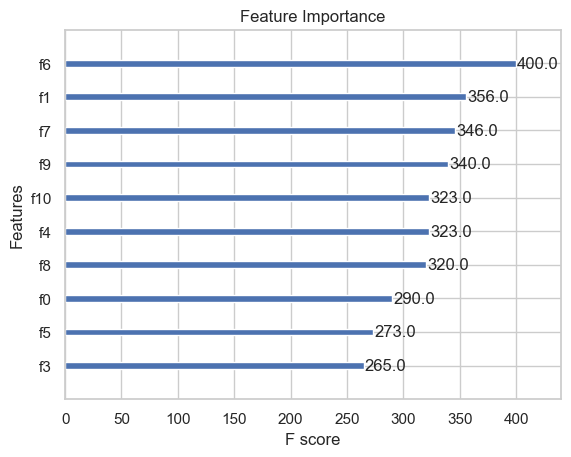

Evaluation of Tuned Model - White Wine:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       321
           1       0.86      0.90      0.88       659

    accuracy                           0.83       980
   macro avg       0.82      0.80      0.81       980
weighted avg       0.83      0.83      0.83       980



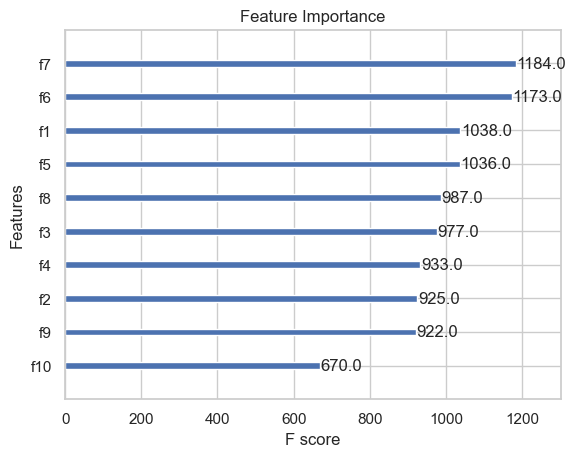

In [16]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on the test data and print a classification report.
    Also, plot the feature importance as determined by the model.

    Parameters:
    model (XGBClassifier): The trained model to evaluate.
    X_test (array-like): Test feature set.
    y_test (array-like): Test target labels.
    """
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Print the classification report to show precision, recall, F1-score, and support for each class
    print(classification_report(y_test, y_pred))
    
    # Plot the feature importance as determined by the model
    xgb.plot_importance(model, max_num_features=10, importance_type='weight')
    plt.title('Feature Importance')
    plt.show()

# Evaluate the tuned model on the red wine test data
print("Evaluation of Tuned Model - Red Wine:")
evaluate_model(best_model_red, X_red_test, y_red_test)

# Evaluate the tuned model on the white wine test data
print("Evaluation of Tuned Model - White Wine:")
evaluate_model(best_model_white, X_white_test, y_white_test)

In [17]:
def prepare_documentation(model, feature_names):
    """
    Prepare documentation and visualizations for sharing findings.
    - Useful for reports and stakeholder presentations.

    Parameters:
    model (XGBClassifier): The trained model to analyze.
    feature_names (array-like): Names of the features used in the model.
    """
    # Extract feature importances from the model
    feature_importances = model.feature_importances_
    
    # Create a DataFrame to display feature names and their corresponding importance scores
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    
    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame to show feature importances
    print("Feature Importances:")
    print(importance_df)

    # Extract the top 5 most important features for actionable insights
    top_features = importance_df.head(5)
    print("\nTop Features Influencing Wine Quality:")
    for index, row in top_features.iterrows():
        print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

    # Provide specific recommendations based on the top features
    print("\nRecommendations based on Feature Importance:")
    for feature in top_features['Feature']:
        if feature in ['alcohol', 'sulphates', 'pH']:
            print(f"- Optimize {feature} levels during production to improve wine quality.")
        elif feature in ['chlorides', 'total sulfur dioxide']:
            print(f"- Monitor and control {feature} to maintain wine stability and taste.")

# Prepare documentation for the red wine model
red_wine_features = red_wine.columns.drop(['quality', 'quality_label', 'encoded_label'])
print("Red Wine Model Documentation:")
prepare_documentation(best_model_red, red_wine_features)

# Prepare documentation for the white wine model
white_wine_features = white_wine.columns.drop(['quality', 'quality_label', 'encoded_label'])
print("\nWhite Wine Model Documentation:")
prepare_documentation(best_model_white, white_wine_features)

Red Wine Model Documentation:
Feature Importances:
                 Feature  Importance
10               alcohol    0.222911
9              sulphates    0.136946
6   total sulfur dioxide    0.094942
1       volatile acidity    0.081036
7                density    0.075550
4              chlorides    0.071797
5    free sulfur dioxide    0.069904
0          fixed acidity    0.069890
8                     pH    0.062645
3         residual sugar    0.061405
2            citric acid    0.052974

Top Features Influencing Wine Quality:
Feature: alcohol, Importance: 0.22291147708892822
Feature: sulphates, Importance: 0.13694602251052856
Feature: total sulfur dioxide, Importance: 0.09494204819202423
Feature: volatile acidity, Importance: 0.08103634417057037
Feature: density, Importance: 0.07555011659860611

Recommendations based on Feature Importance:
- Optimize alcohol levels during production to improve wine quality.
- Optimize sulphates levels during production to improve wine quality.
- Mon